In [1]:
%pip install timm

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for timm from https://files.pythonhosted.org/packages/14/38/05b37b7692e521bbada22593ac3b6d7ba3f378d56b5d1ccb322a541bbb6e/timm-0.9.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for huggingface-hub from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.16.4-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for safetensors from https://files.pythonhosted.org/packages/e4/b5/792a8ba02aac23bf4c500467016472775085c616d0fc5f30aa70037380c3/safetensors-0.3.3-cp39-cp39-macosx_13_0_arm64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e3/bd/4c0a4619494188a9db5d77e2100ab7d54

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn.functional as f
import torchvision
import torchvision.transforms as T
from timm import create_model

In [5]:
model_name = "vit_base_patch16_224"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


In [8]:
IMG_SIZE = (224,224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)

transform = [
    T.Resize(IMG_SIZE),
    T.ToTensor(),
    T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
]

transform = T.Compose(transforms=transform)

In [9]:
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt

--2023-08-24 22:00:34--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolvendo storage.googleapis.com (storage.googleapis.com)... 172.217.162.144, 216.58.222.16, 142.251.132.48, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|172.217.162.144|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 21675 (21K) [text/plain]
Salvando em: “ilsvrc2012_wordnet_lemmas.txt”

ilsvrc2012_wordnet_ 100%[===================>]  21,17K  --.-KB/s    em 0,03s   

2023-08-24 22:00:34 (841 KB/s) - “ilsvrc2012_wordnet_lemmas.txt” salvo [21675/21675]



In [10]:
imagenet_labels = dict(
    enumerate(
        open(
            '/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/VC/ilsvrc2012_wordnet_lemmas.txt')))

In [15]:
x = "/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/VC/amur-tiger-01-01.jpg"
img = PIL.Image.open(x)
img_tensor = transform(img).unsqueeze(0).to(device)

In [16]:
output = model(img_tensor)

Resultado da inferencia: 
tiger, Panthera_tigris



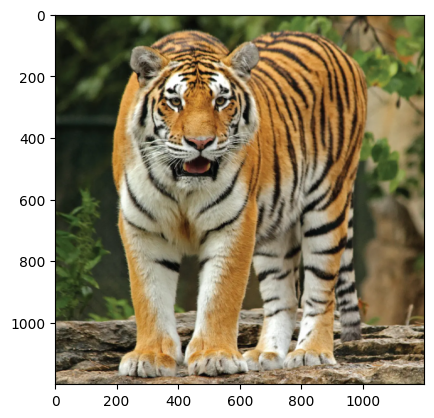

In [19]:
print("Resultado da inferencia: ")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

In [28]:
import torch.nn as f

f.Conv2d(3, 768, kernel_size = (16,16), stride = (16,16))

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [29]:
patches = model.patch_embed(img_tensor)
print("Tensor representation: ", img_tensor.shape)
print("Embeddings Patch: ", patches.shape)

Tensor representation:  torch.Size([1, 3, 224, 224])
Embeddings Patch:  torch.Size([1, 196, 768])


In [31]:
position_embedding = model.pos_embed
print("Positional Emb: ", position_embedding.shape)

Positional Emb:  torch.Size([1, 197, 768])
